In [1]:
library(Seurat)
library(dplyr)
library(Matrix)
library(reshape)
library(ggplot2)

theme_set(theme_cowplot())
options(repr.plot.width=10, repr.plot.height=10)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘reshape’


The following object is masked from ‘package:Matrix’:

    expand


The following object is masked from ‘package:dplyr’:

    rename




ERROR: Error in theme_cowplot(): could not find function "theme_cowplot"




***Build covid data***


In [5]:
setwd('/home/jovyan/data/covid/data')
covid<-readRDS("covid_build.RDS")

In [21]:
Idents(covid)<-"Stage"
covid<-subset(covid, id = "Adult")

In [5]:
covid<-NormalizeData(covid, verbose = FALSE)
covid <- FindVariableFeatures(covid, selection.method = "vst", 
        nfeatures = 2000, verbose = FALSE)

In [6]:
covid <- ScaleData(covid) 

Centering and scaling data matrix



In [24]:
covid <- covid %>% RunPCA(npcs = 30, verbose = FALSE) 

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony converged after 5 iterations

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


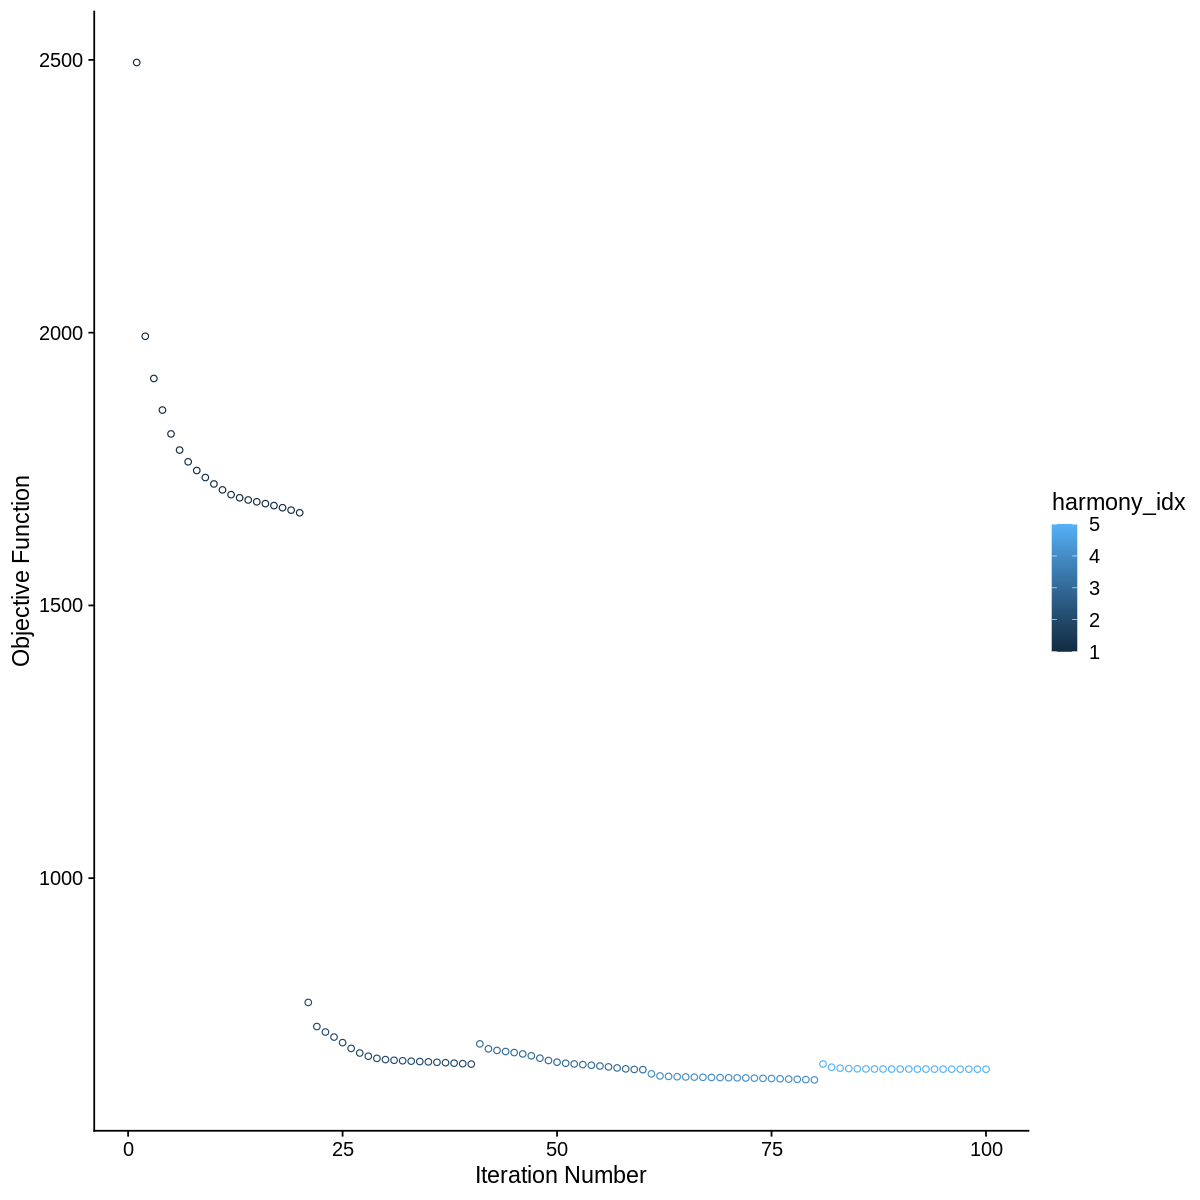

In [25]:
covid <- covid %>% RunHarmony("run", plot_convergence = TRUE)

In [26]:
covid <- covid %>% FindNeighbors(reduction = "harmony", dims = 1:20)

Computing nearest neighbor graph

Computing SNN



In [62]:
covid <- covid %>% FindClusters(resolution = 0.5)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 26275
Number of edges: 937777

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9169
Number of communities: 15
Elapsed time: 6 seconds


In [28]:
covid <- RunUMAP(covid, reduction = "harmony", dims = 1:20)

13:00:02 UMAP embedding parameters a = 0.9922 b = 1.112

13:00:02 Read 26275 rows and found 20 numeric columns

13:00:02 Using Annoy for neighbor search, n_neighbors = 30

13:00:02 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:00:05 Writing NN index file to temp file /tmp/RtmpE7Oj1m/file952413698ae

13:00:05 Searching Annoy index using 1 thread, search_k = 3000

13:00:16 Annoy recall = 100%

13:00:17 Commencing smooth kNN distance calibration using 1 thread

13:00:19 Initializing from normalized Laplacian + noise

13:00:21 Commencing optimization for 200 epochs, with 1146140 positive edges

13:00:33 Optimization finished



Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


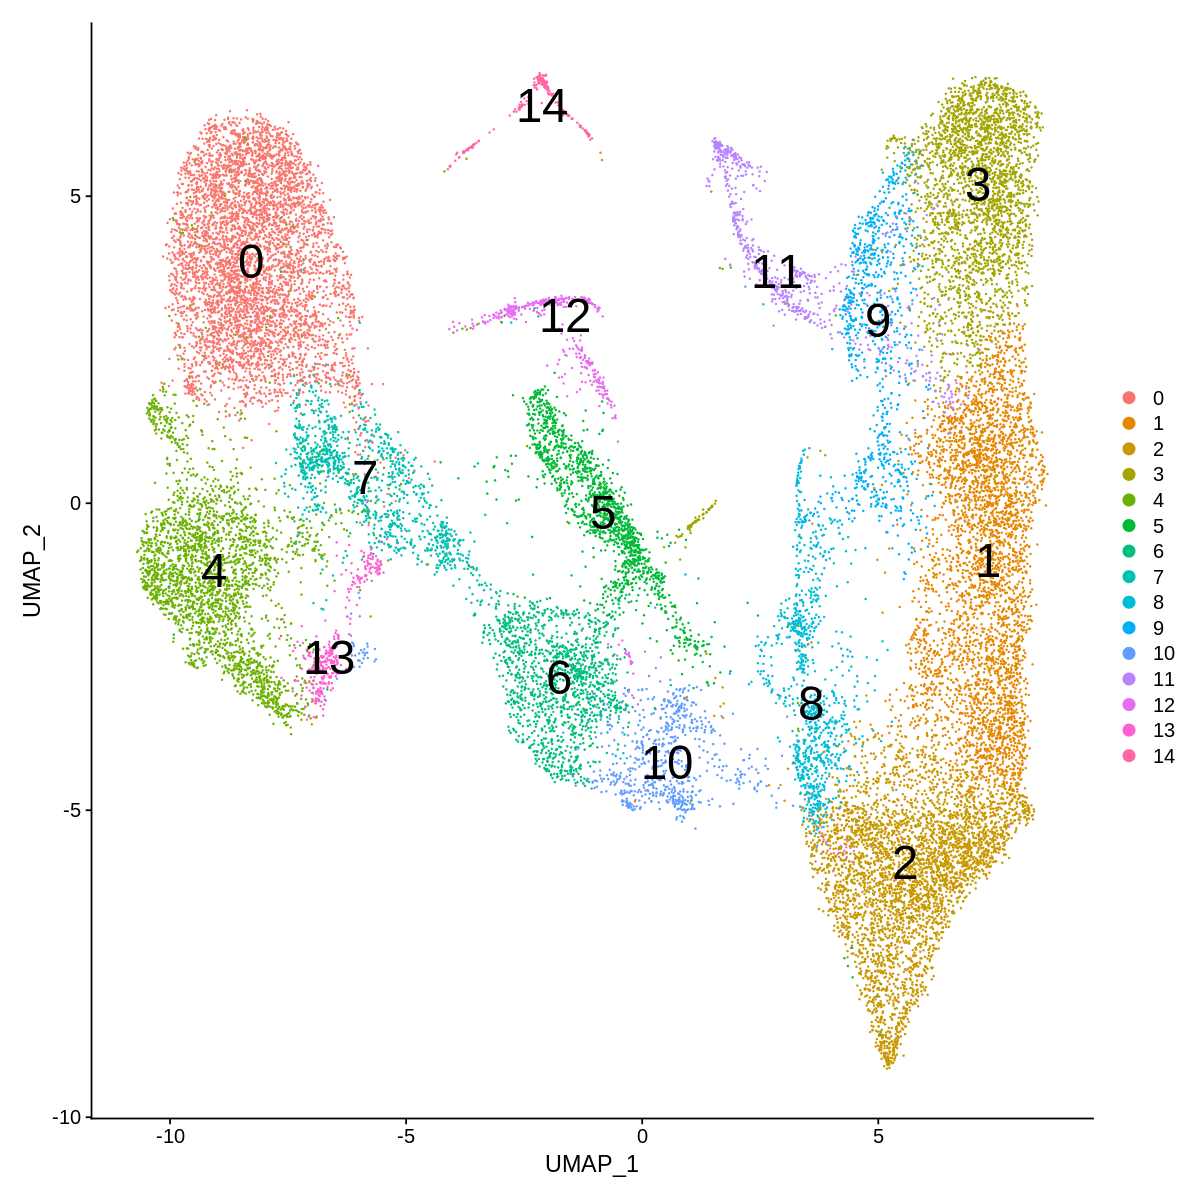

In [4]:
options(repr.plot.width=10, repr.plot.height=10)
Idents(covid)<-"seurat_clusters"
DimPlot(covid, reduction = "umap", label = TRUE, label.size =10)

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


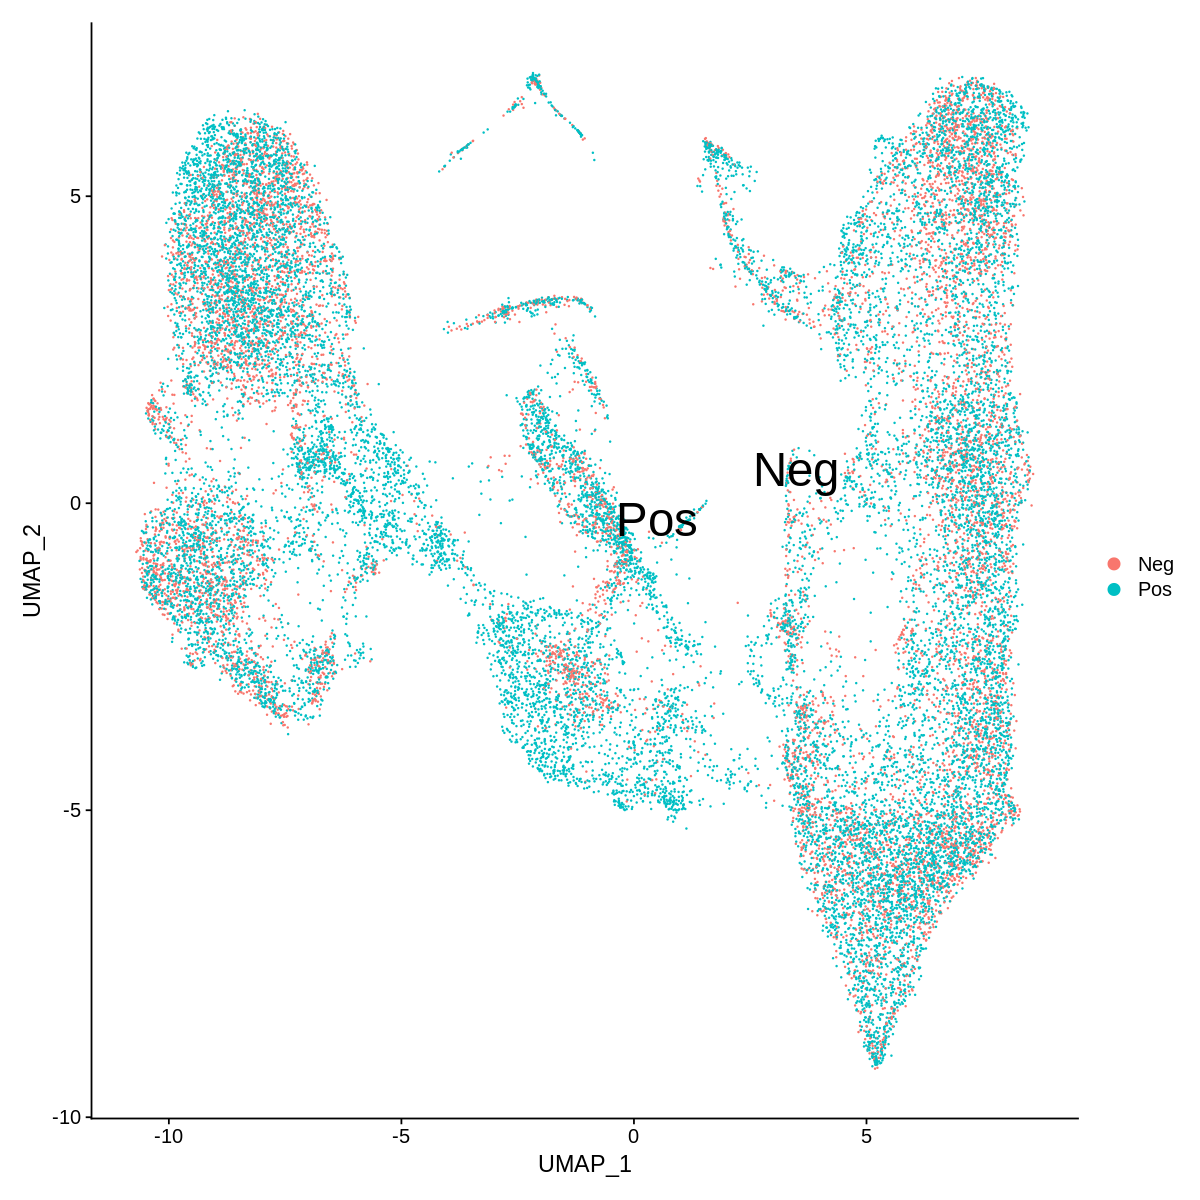

In [3]:
Idents(covid)<-"Treatment"
DimPlot(covid, reduction = "umap", label = TRUE, label.size =10)

In [33]:
Idents(covid)<-"seurat_clusters"
markers <- FindAllMarkers(covid, only.pos = TRUE, min.pct = 0.25, log.fc.threshold = 0.25)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14



In [31]:
head(markers[markers$cluster == 5,], 20)

ERROR: Error in head(markers[markers$cluster == 5, ], 20): object 'markers' not found


Warning message in FetchData(object = object, vars = features, cells = cells):
“The following requested variables were not found: CYR61”


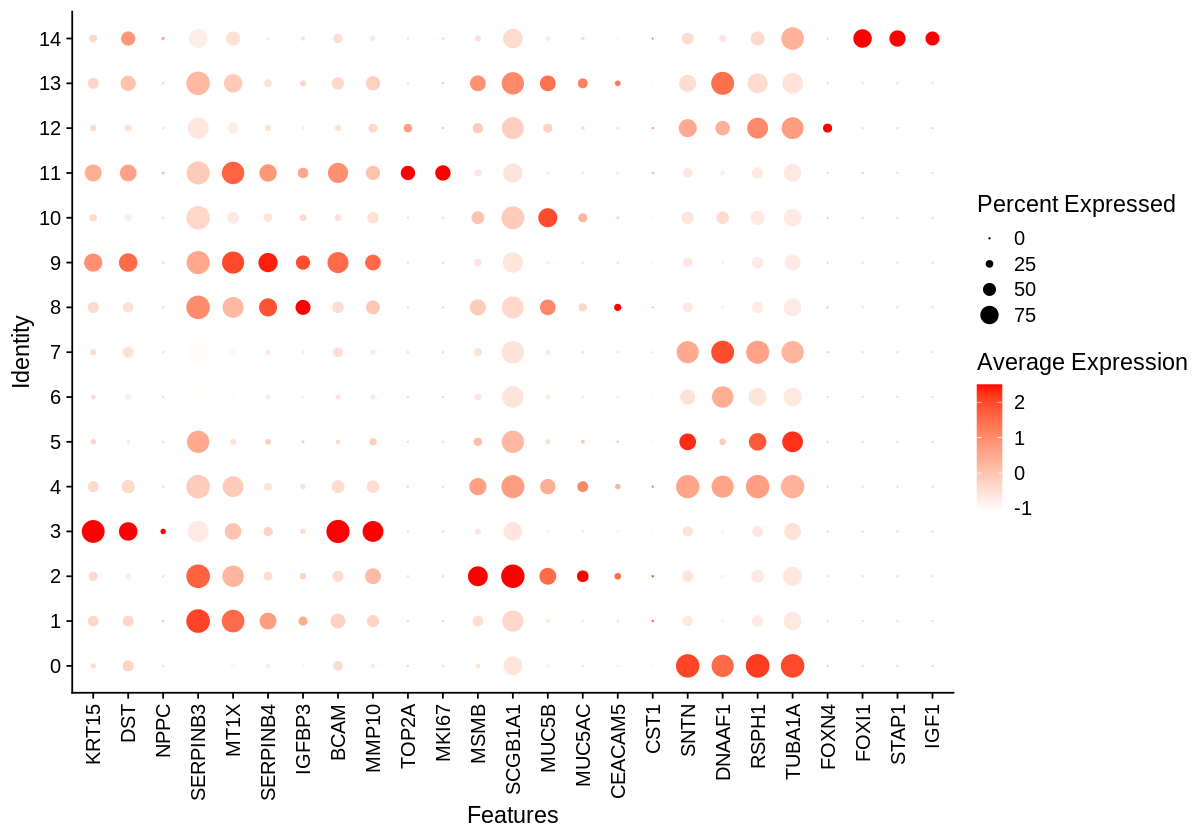

In [5]:
options(repr.plot.width=10, repr.plot.height=7)
nasal_markers<-c("CYR61", "KRT15", "DST", "NPPC",   #basal 1
                 "SERPINB3", "MT1X", "SERPINB4", "IGFBP3",  #basal2
                 "BCAM", "MMP10",  #basal activated
                 "TOP2A", "MKI67", #prolif
                 "MSMB", "SCGB1A1", "MUC5B", "MUC5AC", #club
                 "CEACAM5",  "CST1",  #Goblet
                 "SNTN", "DNAAF1", "RSPH1","TUBA1A",   #ciliated
                 "FOXN4",
                 "FOXI1", "STAP1", "IGF1"
                 )



#nasal_markers<-c("IDO1", "PI3", "NOS2", "SLC26A4", "S100A8", "IL19", "CXCL10", "LYPD2", "LYNX1", "ASRGL1", "S100A4", "PSCA", "CEACAM5")

Idents(covid_S)<-"seurat_clusters"

DotPlot(covid_S, features = nasal_markers, cols = c("white", "red"))+ 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [227]:
Idents(covid)<-"seurat_clusters"
markers<-FindMarkers(covid, ident.1 = c(10), only.pos = TRUE, min.pct=0.25)

In [126]:
###Not run
Idents(covid)<-"seurat_clusters"
new.cluster.ids <- c("Ciliated", "Basal2", "Secretory", "Basal1", "Ciliated", "Ciliated",
                    "Ciliated", "Ciliated", "Secretory", "Basal1", "Secretory",
                    "Basal_prolif", "FOXN4", "Ciliated", "Ionocytes")
                    
names(new.cluster.ids) <- levels(covid)
covid <- RenameIdents(covid, new.cluster.ids)
covid[["initial_clustering"]] <- Idents(covid)

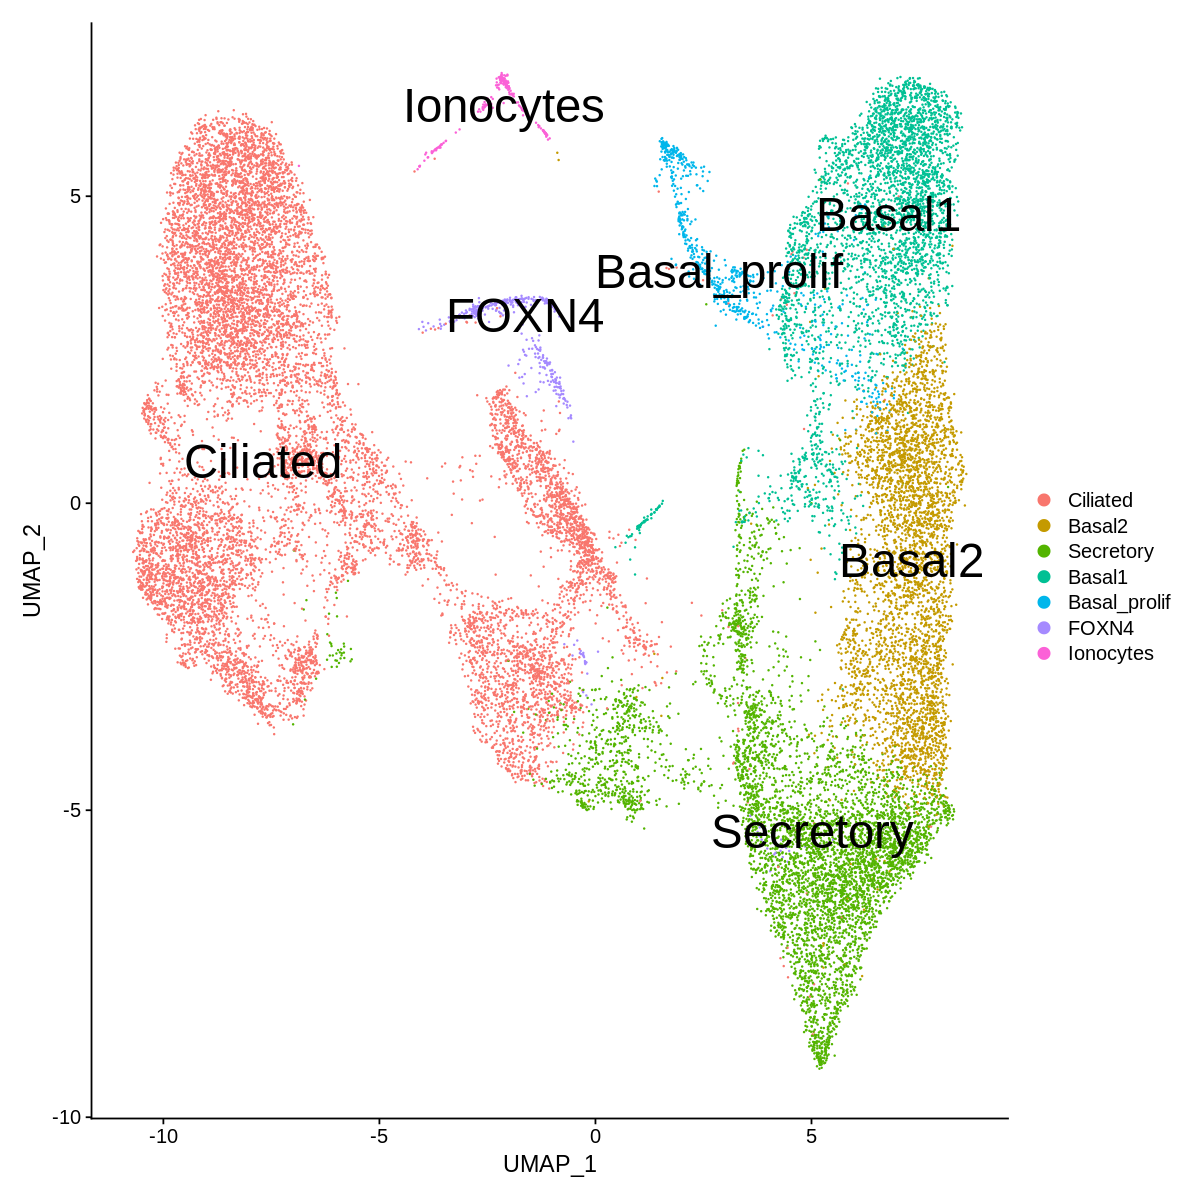

In [127]:
options(repr.plot.width=10, repr.plot.height=10)
Idents(covid)<-"initial_clustering"
DimPlot(covid, reduction = "umap", label = TRUE, label.size =10)

In [128]:
covid@meta.data$initial_clustering <- factor(covid@meta.data$initial_clustering, 
                                              levels = rev(c("Basal1", "Basal2", "Basal_prolif", 
                                                             "Secretory",
                                                             "Ciliated", "FOXN4", "Ionocytes")))

In [152]:
#prediction from US data
setwd('/home/jovyan/data/covid/data/nasal')
predictions<-read.csv("predicted_ids.csv", header= TRUE, row.names = 1)
colnames(predictions)<-"predicted_id"
covid<-AddMetaData(covid, predictions)

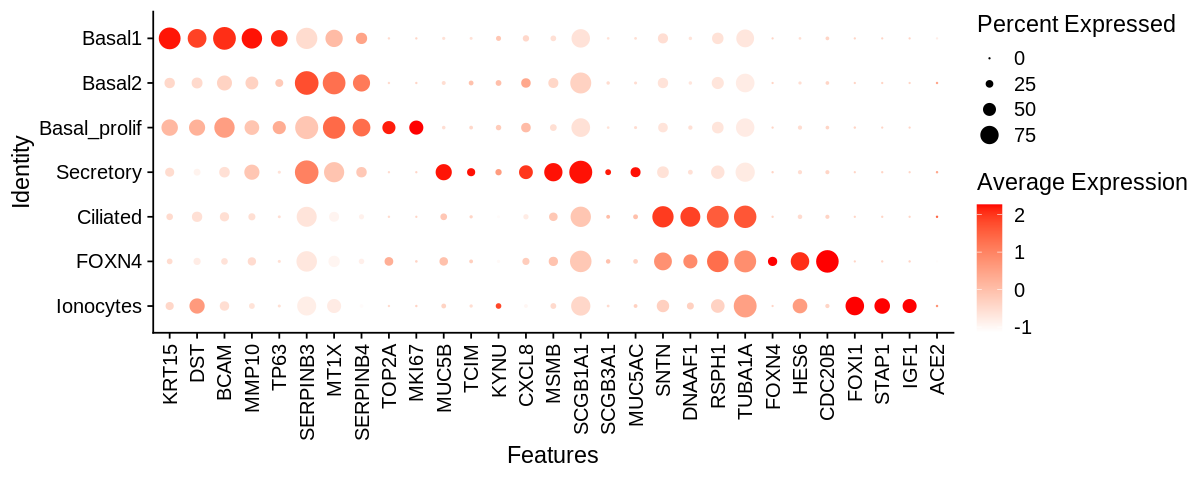

In [164]:
options(repr.plot.width=10, repr.plot.height=4)
nasal_markers<-c("KRT15", "DST", "BCAM", "MMP10", "TP63",   #basal 1
                 "SERPINB3", "MT1X", "SERPINB4",  #basal2
                 "TOP2A", "MKI67", #prolif
                 "MUC5B", "TCIM", "KYNU", "CXCL8",
                 "MSMB", "SCGB1A1", "SCGB3A1",  "MUC5AC", #goblet
                 "SNTN", "DNAAF1", "RSPH1", "TUBA1A",   #ciliated
                 "FOXN4", "HES6", "CDC20B",
                 "FOXI1", "STAP1", "IGF1", "ACE2")

Idents(covid)<-"initial_clustering"

DotPlot(covid, features = nasal_markers, cols = c("white", "red"))+ 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

setwd('/home/jovyan/data/covid/data/nasal/figures')
ggsave("nasal_marker_dotplot.png", plot = last_plot(), device = NULL, path = NULL,width = 10, height = 4,  scale = 1)

In [8]:
Idents(covid)<-"initial_clustering"
markers<-FindAllMarkers(covid, only.pos = TRUE, min.pct=0.25, logfc.threshold = 0.25)

Calculating cluster Ionocytes

Calculating cluster FOXN4

Calculating cluster Ciliated

Calculating cluster Goblet

Calculating cluster Club

Calculating cluster Basal_prolif

Calculating cluster Basal2

Calculating cluster Basal1



In [9]:
setwd('/home/jovyan/data/covid/data/nasal')
write.csv(markers, "nasal_markers.csv")

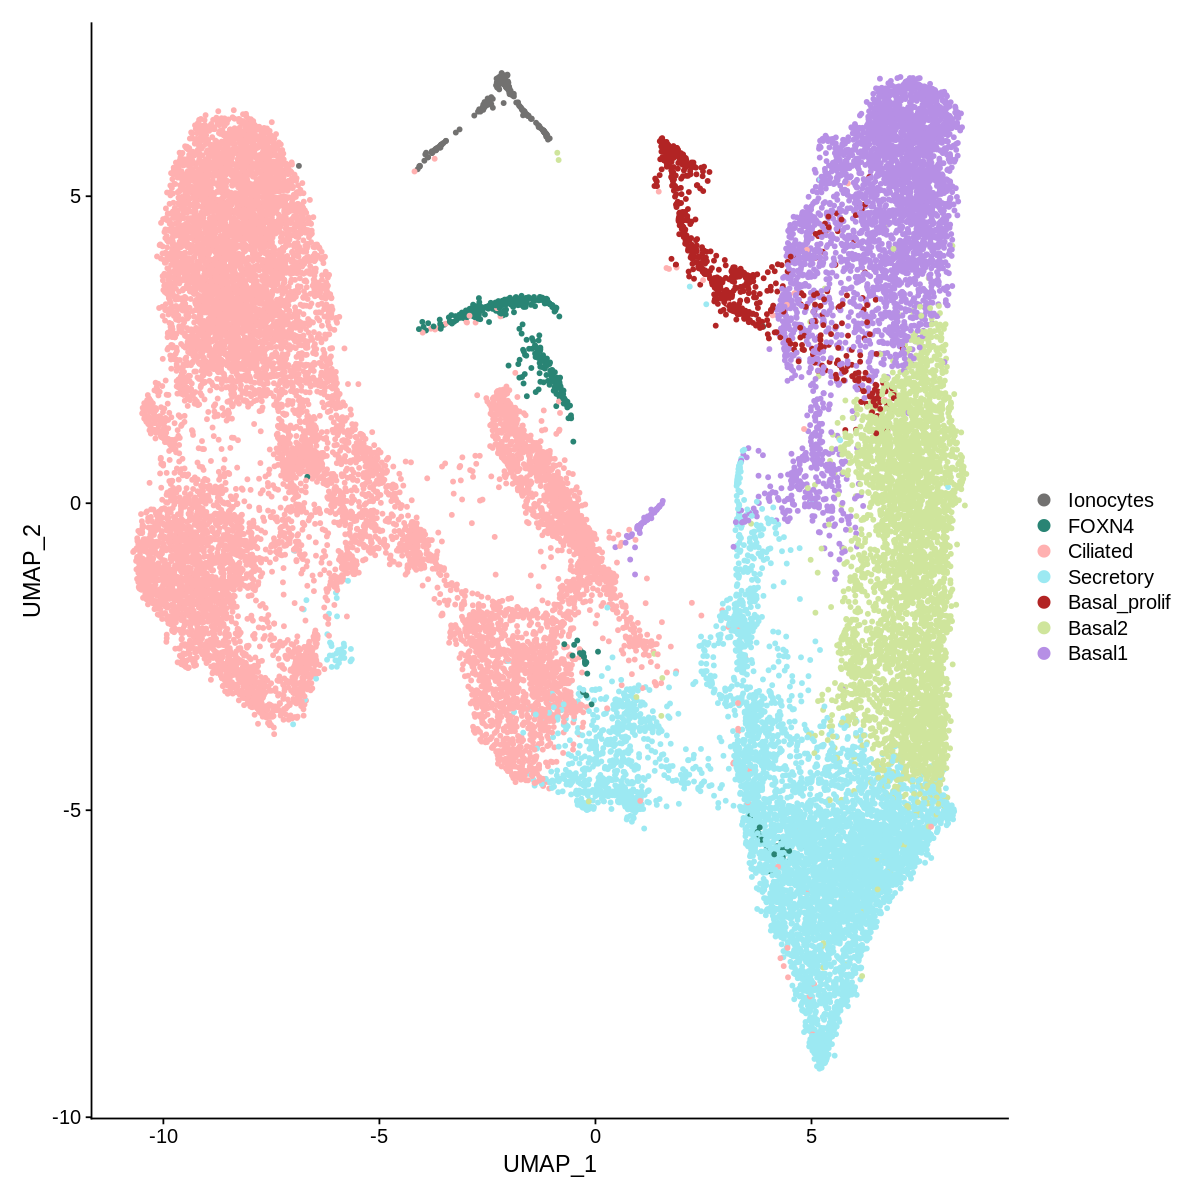

In [4]:
options(repr.plot.width=10, repr.plot.height=10)
Idents(covid)<-"initial_clustering"
DimPlot(covid, reduction = "umap", 
        label = FALSE, pt.size =1,
        cols = c('#727170', '#298474','#FFB0B0', '#9CE9F2', '#b22424','#CFE59C', '#B68FE5'))

setwd('/home/jovyan/data/covid/data/nasal/figures')
ggsave("nasal_UMAP.png", plot = last_plot(), device = NULL, path = NULL,width = 10, height = 10,  scale = 1)

In [ ]:
setwd('/home/jovyan/data/covid/data')
saveRDS(covid, "covid_nasal.RDS")



***Restart***



In [ ]:
setwd('/home/jovyan/data/covid/data')
covid<-readRDS("covid_nasal.RDS")

In [3]:
Idents(covid)<-"Treatment"
covid_US<-subset(covid, id = 'Neg')
covid_S<-subset(covid, id = 'Pos')



***Expression of virus by subset**



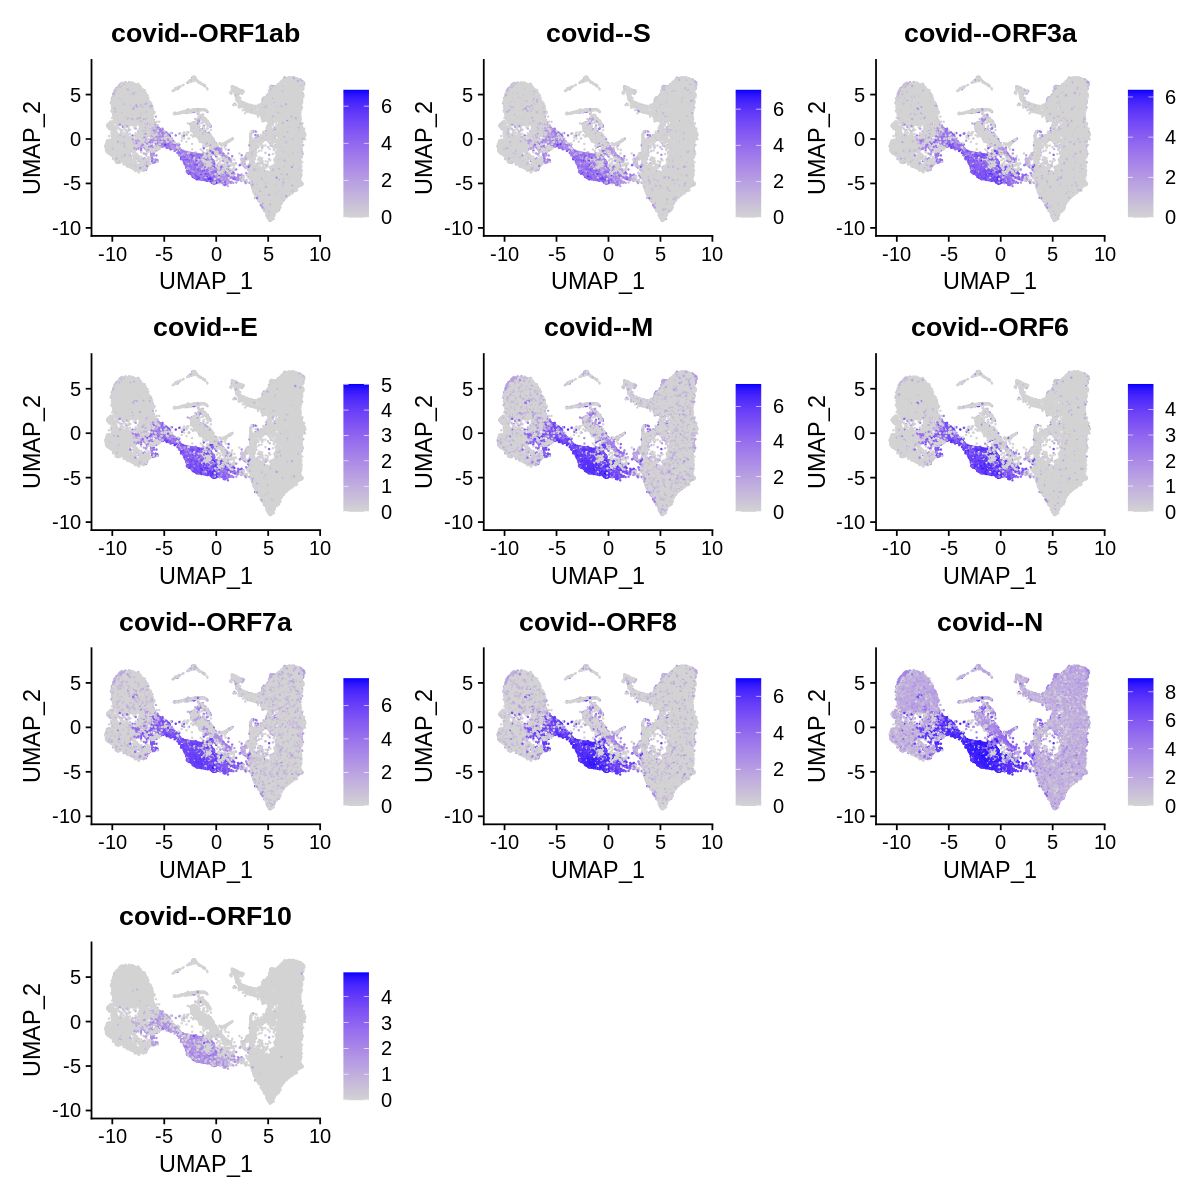

In [30]:
options(repr.plot.width=10, repr.plot.height=10)
FeaturePlot(covid, features = c("covid--ORF1ab", "covid--S", "covid--ORF3a",
                               "covid--E", "covid--M", "covid--ORF6", "covid--ORF7a", "covid--ORF8",
                               "covid--N", "covid--ORF10"), ncol = 3)

setwd('/home/jovyan/data/covid/data/nasal/figures')
ggsave("infection_UMAP.png", plot = last_plot(), device = NULL, path = NULL,width = 10, height = 10,  scale = 1)

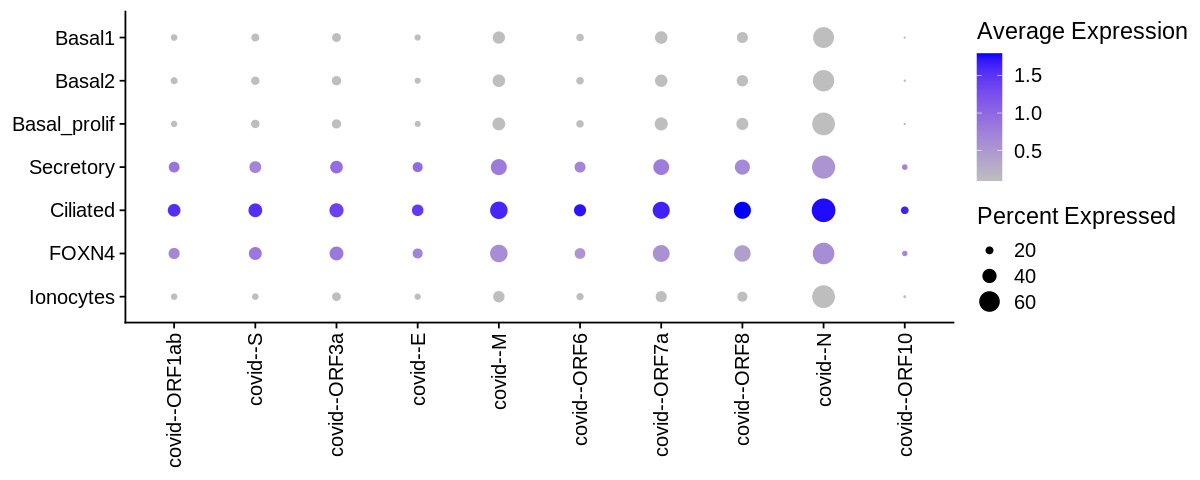

In [9]:
options(repr.plot.width=10, repr.plot.height=4)
nasal_markers<-c("covid--ORF1ab", "covid--S", "covid--ORF3a",
                               "covid--E", "covid--M", "covid--ORF6", "covid--ORF7a", "covid--ORF8",
                               "covid--N", "covid--ORF10")

Idents(covid)<-"initial_clustering"

DotPlot(covid, features = nasal_markers, cols = c("grey", "blue"), col.min = 0.1)+ 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
theme(axis.title.x = element_blank()) + theme(axis.title.y = element_blank())

setwd('/home/jovyan/data/covid/data/nasal/figures')
ggsave("infection_dotplot.png", plot = last_plot(), device = NULL, path = NULL,width = 10, height = 4,  scale = 1)

In [179]:
setwd('/home/jovyan/data/covid/data')
saveRDS(covid, "covid_nasal.RDS")



***Introduce infected cell category***



In [108]:
setwd('/home/jovyan/data/covid/data')
covid<-readRDS("covid_nasal.RDS")

In [132]:
##Create a new identity class based on whether cell is infected
infected <- subset(x = covid, subset = `covid--S` > 0, slot='counts')

In [133]:
## Get cell names
uninfected_cells <- subset(x = covid, subset = (`covid--S` == 0), slot='counts')
infected_cells <- subset(x = covid, subset = (`covid--S` > 0), slot='counts')

Idents(object = covid, cells = Cells(uninfected_cells)) <- 'uninfected'
Idents(object = covid, cells = Cells(infected_cells)) <- 'infected'

covid[["infection"]] <- Idents(covid)

In [288]:
covid@meta.data$combined<-paste0(covid@meta.data$Treatment, '_', covid@meta.data$infection)

In [88]:
a<-dplyr::select(covid@meta.data, infection, combined)
setwd('/home/jovyan/data/covid/data')
write.csv(a, "covid_infected_cells.csv")

In [136]:
###Import interferon gene list

setwd('/home/jovyan/data/covid/data/nasal')
IFN_genes<-read.csv("ISG_list_CD.csv", header=FALSE)



***Look for higher interferon response in uninfected cells - do transitional cells have reduced capacity to respond***



In [137]:
###https://www.gsea-msigdb.org/gsea/msigdb/cards/GO_RESPONSE_TO_TYPE_I_INTERFERON
#interferon_gene_signature<-list(c("ABCE1", 	"ADAR", 	"BST2", 	"CACTIN", 	"CDC37", 	"CNOT7", 	"DCST1", 	"EGR1", 	"FADD", 	"GBP2", 	"HLA-E", 	"HLA-F", 	"HLA-G", 	"HLA-H", 	"HSP90AB1", 	"IFI27", 	"IFI35", 	"IFI6", 	"IFIT1", 	"IFIT2", 	"IFIT3", 	"IFITM1", 	"IFITM2", 	"IFITM3", 	"IFNA1", 	"IFNA10", 	"IFNA13", 	"IFNA14", 	"IFNA16", 	"IFNA17", 	"IFNA2", 	"IFNA21", 	"IFNA4", 	"IFNA5", 	"IFNA6", 	"IFNA7", 	"IFNA8", 	"IFNAR1", 	"IFNAR2", 	"IFNB1", 	"IKBKE", 	"IP6K2", 	"IRAK1", 	"IRF1", 	"IRF2", 	"IRF3", 	"IRF4", 	"IRF5", 	"IRF6", 	"IRF7", 	"IRF8", 	"IRF9", 	"ISG15", 	"ISG20", 	"JAK1", 	"LSM14A", 	"MAVS", 	"METTL3", 	"MIR21", 	"MMP12", 	"MUL1", 	"MX1", 	"MX2", 	"MYD88", 	"NLRC5", 	"OAS1", 	"OAS2", 	"OAS3", 	"OASL", 	"PSMB8", 	"PTPN1", 	"PTPN11", 	"PTPN2", 	"PTPN6", 	"RNASEL", 	"RSAD2", 	"SAMHD1", 	"SCRIB", 	"SETD2", 	"SHFL", 	"SHMT2", 	"SP100", 	"STAT1", 	"STAT2", 	"TBK1", 	"TREX1", 	"TRIM56", 	"TRIM6", 	"TTLL12", 	"TYK2", 	"UBE2K", 	"USP18", 	"WNT5A", 	"XAF1", 	"YTHDF2", 	"YTHDF3", 	"ZBP1"))

covid<-AddModuleScore(object = covid, features = list(IFN_genes$V1), name = "IFN_signature_S", ctrl.size = 20)

Warning message:
“The following features are not present in the object: AGAP10, C14orf159, C19orf66, CCDC109B, CRIPAK, HIST1H2AC, HIST1H2BD, HIST1H4C, HIST2H2AA3, HIST2H2AA4, HIST2H2AC, HIST2H2BE, LOC100128274, LOC644936, NA, PVRL2, RARRES3, SEPT5, SQRDL, TMEM173, WARS, not searching for symbol synonyms”


In [289]:
df<-dplyr::select(covid@meta.data, combined, initial_clustering, IFN_signature_S1)

In [290]:
df<-df %>% 
group_by(combined, initial_clustering) %>% 
filter(IFN_signature_S1 > 0) %>%
summarise(mean = mean(IFN_signature_S1), pos = (sum(IFN_signature_S1 > 0) / sum(IFN_signature_S1 <1000)))



`summarise()` regrouping output by 'combined' (override with `.groups` argument)



In [292]:
df <- df %>% filter(combined != "Neg_infected")

In [293]:
df$combined <- factor(df$combined, levels = c("Neg_uninfected",
                                                            "Pos_uninfected",
                                                            "Pos_infected"))

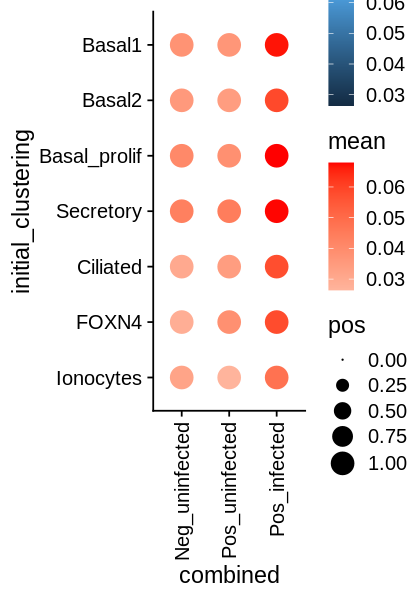

In [294]:
options(repr.plot.width=3.5, repr.plot.height=)
ggplot(data=df, aes(x = combined, y = initial_clustering, fill = mean)) + 
geom_point(aes(size=pos, colour = mean)) + scale_size_area(limits = c(0,1)) + 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ scale_color_gradient2(low = "blue", mid = "white",
                            high = "red")

setwd('/home/jovyan/data/covid/data/nasal/figures')
ggsave("interferon_score_dotplot.png", plot = last_plot(), device = NULL, path = NULL,width = 3.5, height = 6,  scale = 1)



***ISG as a heatmap***



In [150]:
Idents(covid)<-"Treatment"
covid_US<-subset(covid, id = 'Neg')
covid_S<-subset(covid, id = 'Pos')

In [151]:
covid_S@meta.data$combined<-paste0(covid_S@meta.data$initial_clustering, '-', covid_S@meta.data$infection)

In [166]:
df<-as.data.frame(table(covid_S@meta.data$combined))
df<-tidyr::separate(df, Var1, c("Cell", "infection"), "-")

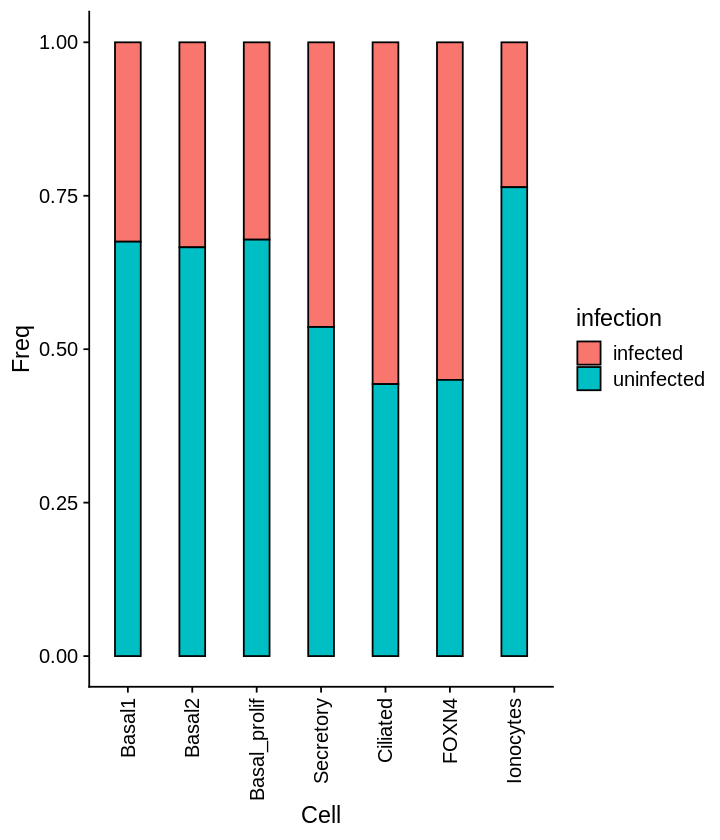

In [173]:
df$Cell <- factor(df$Cell, levels = c("Basal1", "Basal2", "Basal_prolif","Secretory",
                                      "Ciliated",                                   
                                      "FOXN4",  "Ionocytes"))

ggplot(df, aes(x=Cell, y = Freq, fill=infection))+ 
    geom_bar(position="fill", stat="identity", width = 0.4, colour = "black")+ theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

options(repr.plot.width=6, repr.plot.height=7)

setwd('/home/jovyan/data/covid/data/nasal/figures')
ggsave("proportion_infected.png", plot = last_plot(), device = NULL, path = NULL,width = 6, height = 7,  scale = 1)




***Full view of ISGs***



In [89]:
setwd('/home/jovyan/data/covid/data')
covid<-readRDS("covid_nasal.RDS")

In [177]:
#remove category of untreated but infected cells

covid@meta.data$combined<-paste0(covid@meta.data$Treatment, '_',
                                covid@meta.data$infection)

Idents(covid)<-"combined"
covid<-subset(covid, id = "Neg_infected", invert = TRUE)

In [183]:
#Make category of cell type, treatment and whether infected

covid@meta.data$combined<-paste0(covid@meta.data$initial_clustering, '_', 
                                 covid@meta.data$Treatment, '_',
                                covid@meta.data$infection)

In [ ]:
###Import Chris' gene list

setwd('/home/jovyan/data/covid/data/nasal')
IFN_genes<-read.csv("ISG_list_CD.csv", header=FALSE)

In [270]:
##Trim list of ISGs for those differentially expressed between mock and treated
DEGs<-data.frame(p_val = double(), avg_log2FC = double(), pct.1 = double(), pct.2 = double(), p_val_adj = double, 
         cluster = double(), gene = double(), celltype = double())

for (i in unique(covid@meta.data$initial_clustering)){
    Idents(covid)<-"initial_clustering"
    test<-subset(covid, id = i)
    Idents(test)<-"combined"
    markers<-FindAllMarkers(test, only.pos = TRUE, min.pct = 0.25, log.fc.threshold = 0.25)
    markers$celltype<-paste0(i)
    DEGs<-rbind(DEGs, markers)
    }

Calculating cluster Ciliated_Neg_uninfected

Calculating cluster Ciliated_Pos_infected

Calculating cluster Ciliated_Pos_uninfected

Calculating cluster Secretory_Neg_uninfected

Calculating cluster Secretory_Pos_infected

Calculating cluster Secretory_Pos_uninfected

Calculating cluster Basal1_Neg_uninfected

Calculating cluster Basal1_Pos_infected

Calculating cluster Basal1_Pos_uninfected

Calculating cluster Basal2_Neg_uninfected

Calculating cluster Basal2_Pos_infected

Calculating cluster Basal2_Pos_uninfected

Calculating cluster FOXN4_Neg_uninfected

Calculating cluster FOXN4_Pos_infected

Calculating cluster FOXN4_Pos_uninfected

Calculating cluster Basal_prolif_Neg_uninfected

Calculating cluster Basal_prolif_Pos_infected

Calculating cluster Basal_prolif_Pos_uninfected

Calculating cluster Ionocytes_Pos_infected

Calculating cluster Ionocytes_Pos_uninfected

Calculating cluster Ionocytes_Neg_uninfected



In [271]:
#keep only ISGs that are differentially expressed between mock and treated

genelist<-IFN_genes[IFN_genes$V1 %in% DEGs$gene,]

In [273]:
#calculate average expression - note using scaled data (mean of z-score)
Idents(covid)<-"combined"
df<-AverageExpression(covid, slot = "scale.data")

Finished averaging RNA for cluster Ciliated_Neg_uninfected

Finished averaging RNA for cluster Secretory_Neg_uninfected

Finished averaging RNA for cluster Basal1_Neg_uninfected

Finished averaging RNA for cluster Basal2_Neg_uninfected

Finished averaging RNA for cluster FOXN4_Neg_uninfected

Finished averaging RNA for cluster Basal_prolif_Neg_uninfected

Finished averaging RNA for cluster Ciliated_Pos_infected

Finished averaging RNA for cluster Basal1_Pos_infected

Finished averaging RNA for cluster Secretory_Pos_infected

Finished averaging RNA for cluster Secretory_Pos_uninfected

Finished averaging RNA for cluster Ciliated_Pos_uninfected

Finished averaging RNA for cluster Basal1_Pos_uninfected

Finished averaging RNA for cluster Basal2_Pos_infected

Finished averaging RNA for cluster FOXN4_Pos_infected

Finished averaging RNA for cluster Basal_prolif_Pos_infected

Finished averaging RNA for cluster Ionocytes_Pos_infected

Finished averaging RNA for cluster Basal2_Pos_uninfected



In [275]:
test <- df$RNA %>% filter(rownames(df$RNA) %in% genelist)

In [276]:
test$genes<-rownames(test)

In [277]:
test<-melt(test, "genes")

In [282]:
test$variable <- factor(test$variable, levels = rev(c("Basal1_Neg_uninfected", "Basal1_Pos_uninfected", "Basal1_Pos_infected",
                                              "Basal2_Neg_uninfected", "Basal2_Pos_uninfected", "Basal2_Pos_infected",
                                              "Basal_prolif_Neg_uninfected", "Basal_prolif_Pos_uninfected", "Basal_prolif_Pos_infected",
                                              "Secretory_Neg_uninfected", "Secretory_Pos_uninfected", "Secretory_Pos_infected",
                                              "Ciliated_Neg_uninfected", "Ciliated_Pos_uninfected", "Ciliated_Pos_infected",
                                              "FOXN4_Neg_uninfected", "FOXN4_Pos_uninfected", "FOXN4_Pos_infected",
                                              "Ionocytes_Neg_uninfected", "Ionocytes_Pos_uninfected", "Ionocytes_Pos_infected"
                                             )))

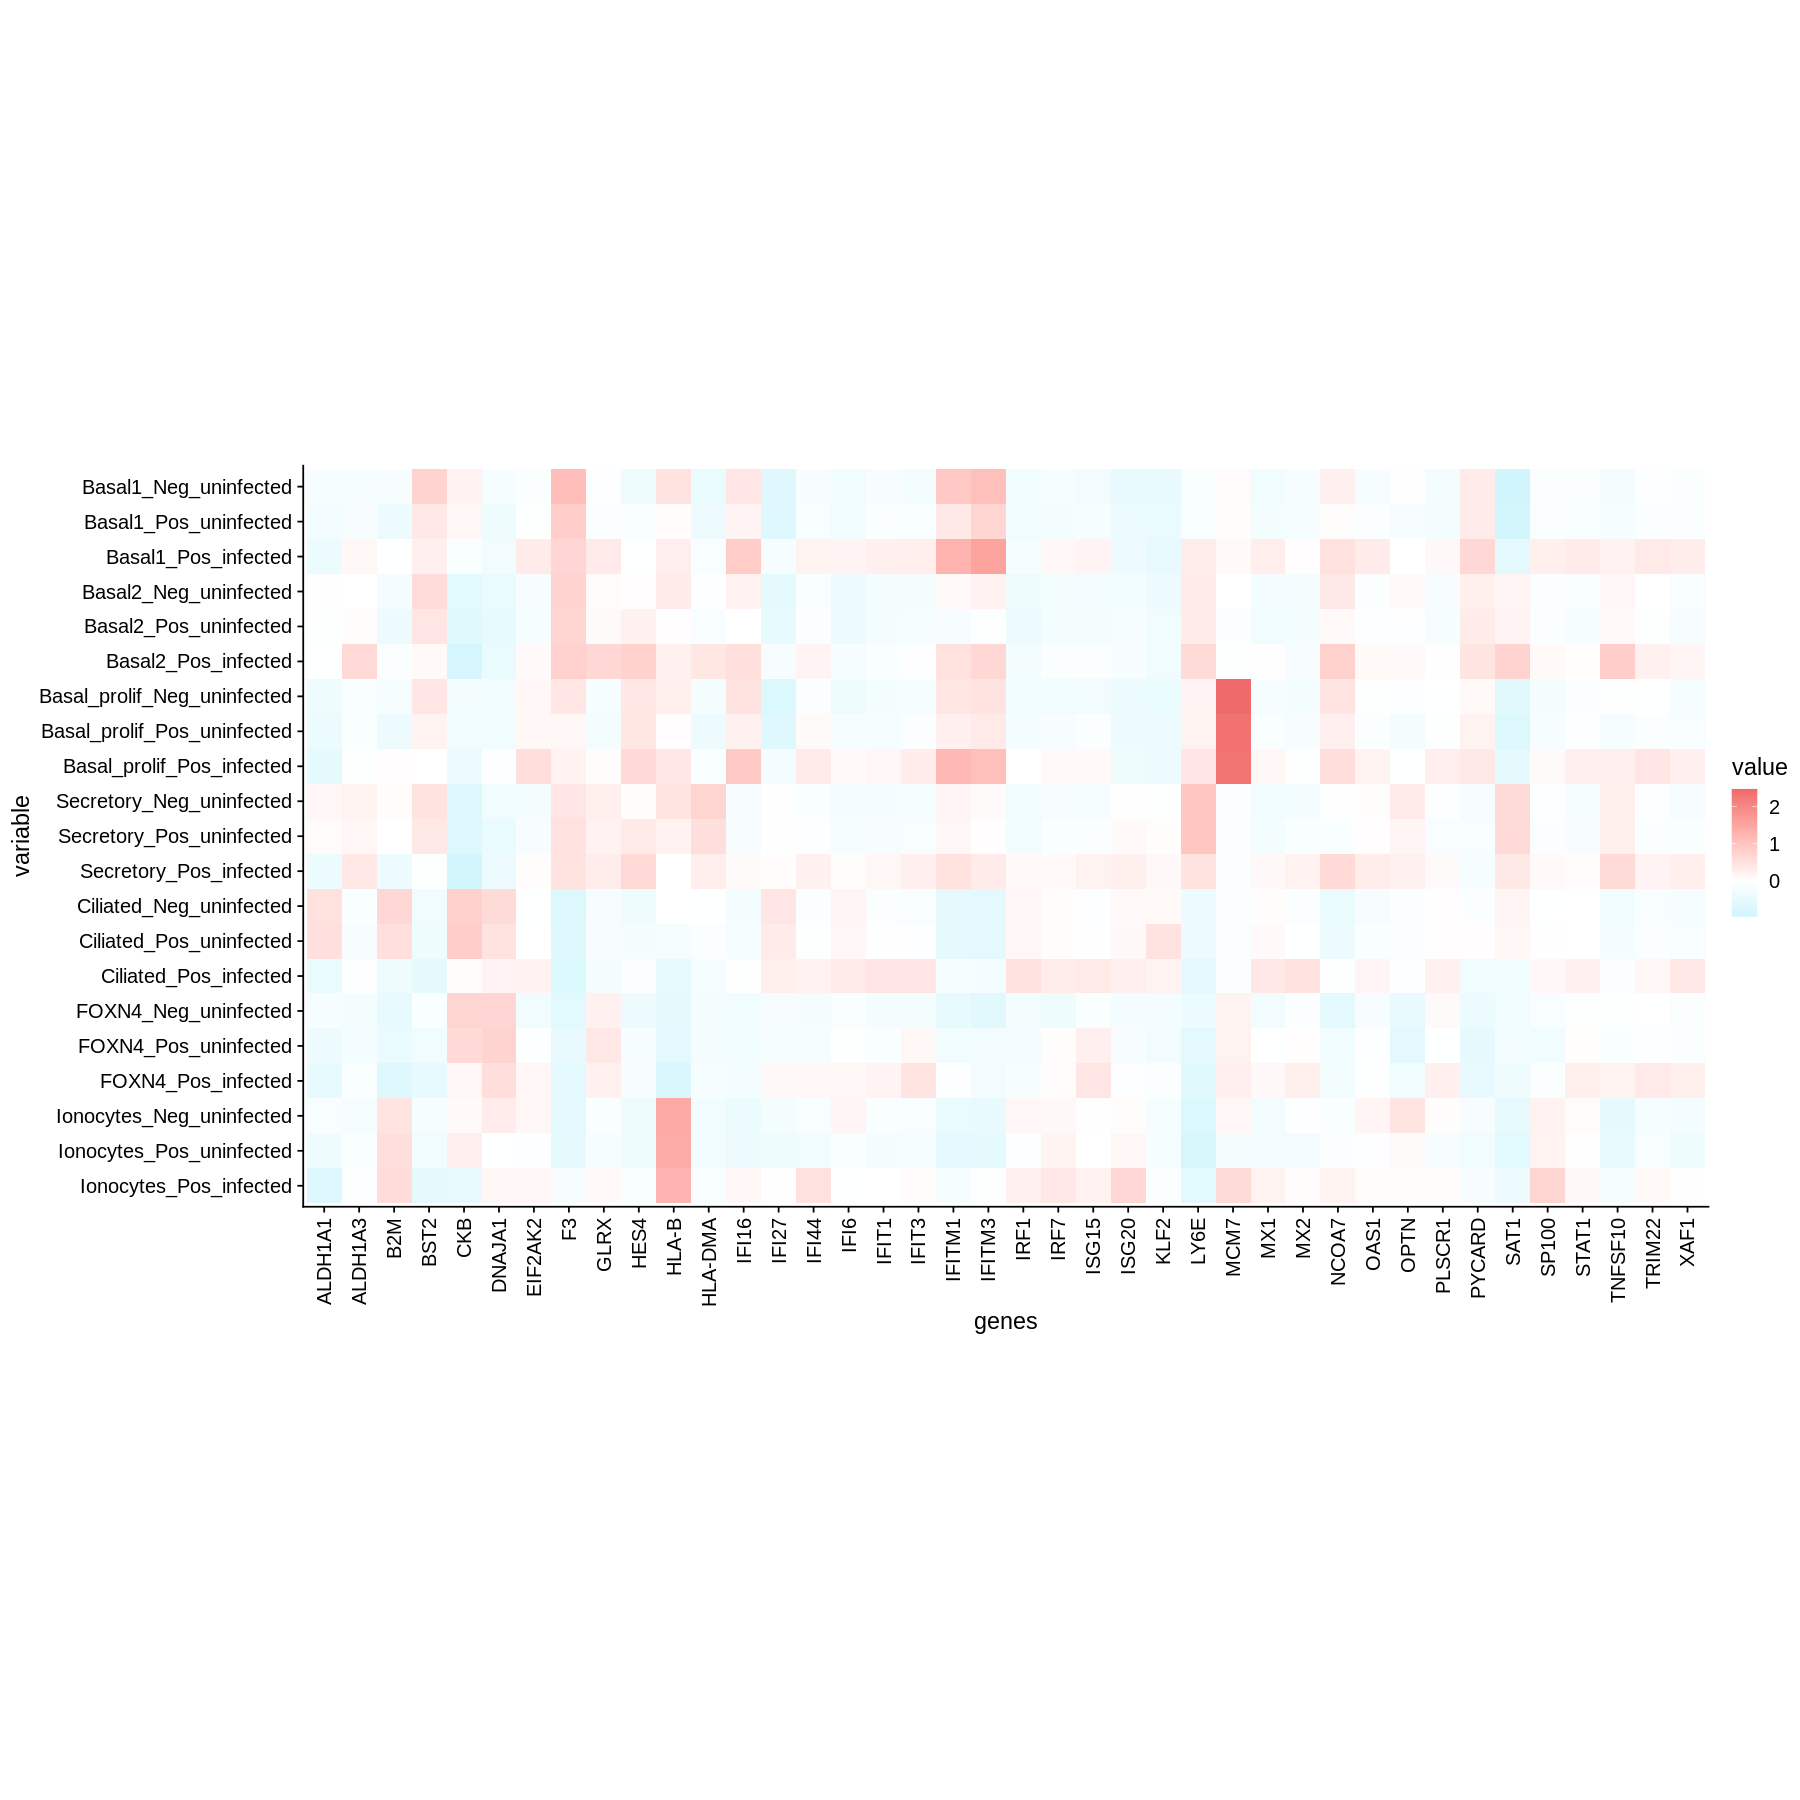

In [287]:
options(repr.plot.width=15, repr.plot.height=15)

ggplot(test, aes(genes, variable, fill = value)) +
  geom_tile()+coord_fixed()+scale_fill_gradient2(
  low = "#74E5F7",
  mid = "white",
  high = "#EF6A6A")+ theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

setwd('/home/jovyan/data/covid/data/nasal/figures')
ggsave("interferon_score_heatmap.png", plot = last_plot(), device = NULL, path = NULL,width = 15, height = 15,  scale = 1)



**ISGs in untreated vs treated cells, filtered for DEGs***



In [143]:
DEGs<-data.frame(p_val = double(), avg_log2FC = double(), pct.1 = double(), pct.2 = double(), p_val_adj = double, 
         cluster = double(), gene = double(), celltype = double())

for (i in unique(covid_S@meta.data$initial_clustering)){
    Idents(covid_S)<-"initial_clustering"
    test<-subset(covid_S, id = i)
    Idents(test)<-"infection"
    markers<-FindAllMarkers(test, only.pos = TRUE, min.pct = 0.25, log.fc.threshold = 0.25)
    markers$celltype<-paste0(i)
    DEGs<-rbind(DEGs, markers)
    }

Calculating cluster uninfected

Calculating cluster infected

Calculating cluster uninfected

Calculating cluster infected

Calculating cluster uninfected

Calculating cluster infected

Calculating cluster uninfected

Calculating cluster infected

Calculating cluster uninfected

Calculating cluster infected

Calculating cluster uninfected

Calculating cluster infected

Calculating cluster uninfected

Calculating cluster infected

Calculating cluster uninfected

Calculating cluster infected



In [313]:
DEGs_infected<-DEGs

In [314]:
DEGs<-data.frame(p_val = double(), avg_log2FC = double(), pct.1 = double(), pct.2 = double(), p_val_adj = double, 
         cluster = double(), gene = double(), celltype = double())

for (i in unique(covid@meta.data$initial_clustering)){
    Idents(covid)<-"initial_clustering"
    test<-subset(covid, id = i)
    Idents(test)<-"Treatment"
    markers<-FindAllMarkers(test, only.pos = TRUE, min.pct = 0.25, log.fc.threshold = 0.25)
    markers$celltype<-paste0(i)
    DEGs<-rbind(DEGs, markers)
    }

Calculating cluster Neg

Calculating cluster Pos

Calculating cluster Neg

Calculating cluster Pos

Calculating cluster Neg

Calculating cluster Pos

Calculating cluster Neg

Calculating cluster Pos

Calculating cluster Neg

Calculating cluster Pos

Calculating cluster Neg

Calculating cluster Pos

Calculating cluster Neg

Calculating cluster Pos

Calculating cluster Pos

Calculating cluster Neg



In [316]:
DEGs_infected<-DEGs[DEGs$cluster == "Pos",]

In [317]:
###Subset those DEGs based on whether they are in Chris' list

IFN_DEGs<-DEGs_infected[DEGs_infected$gene %in% as.list(IFN_genes)$V1,]

In [319]:
df<-data.frame(table(IFN_DEGs$celltype, IFN_DEGs$gene))
colnames(df)<-c("celltype", "gene", "binary")

In [320]:
a<-df %>% group_by(gene) %>% count(binary) %>% filter(binary == 1) %>% arrange(n)


In [321]:
df$celltype <- factor(df$celltype, levels = rev(c("Basal1", "Basal2", "Basal_prolif",
                                      "Ciliated", "Ciliated_imm",
                                      "Club",
                                      "Ionocytes", 
                                      "FOXN4")))

In [322]:
df$gene <- factor(df$gene, levels = rev(a$gene))

In [323]:
df$celltype <- factor(df$celltype, levels = rev(c("Basal1", "Basal2", "Basal_prolif",
                                      "Ciliated", "Ciliated_imm",
                                      "Club",
                                      "Ionocytes", 
                                      "FOXN4")))

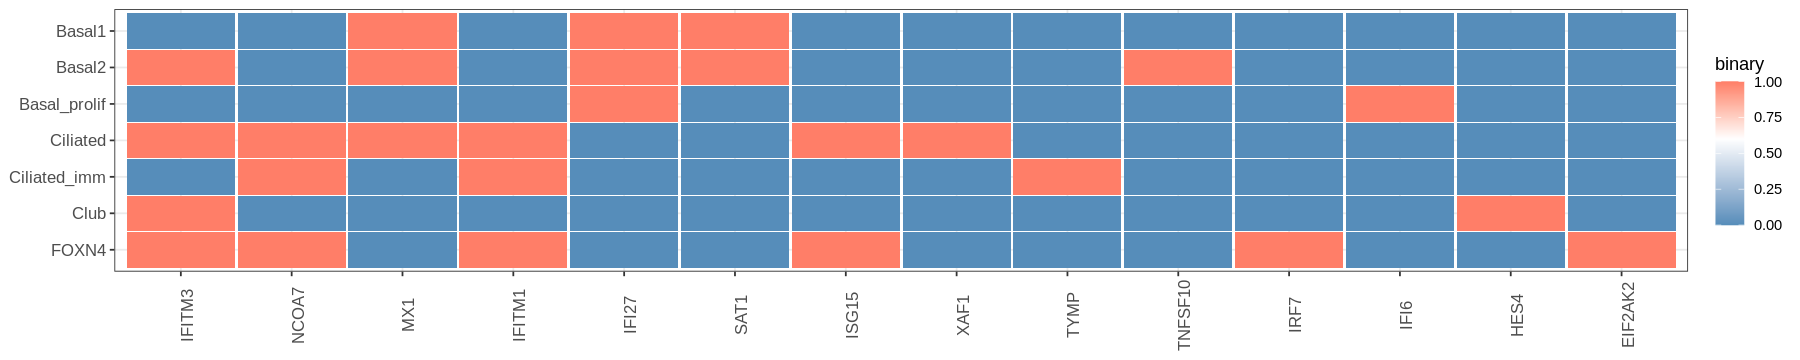

In [324]:
options(repr.plot.width=15, repr.plot.height=3)

ggplot(df, aes(celltype, gene, fill= binary)) + 
geom_tile(width=0.975, height=0.975) + theme_bw() + coord_flip() + 
theme(axis.text.x = element_text(angle = 90, size = 10),
      axis.text.y = element_text(angle = 0, size = 10),
     axis.title.x=element_blank(),
      axis.title.y=element_blank()) +
scale_fill_gradient2(low = "#568dba", mid = "white", high = "#f42222", midpoint = 0.6)



***Expression of covid entry receptors***



In [4]:
##https://dgopstein.github.io/articles/spot-matrix/

spot.theme <- list(
  theme_classic(),
  theme(axis.ticks.x=element_blank(), axis.text.x=element_text(size = 19, angle = 90, hjust = 0)),
  theme(axis.ticks.y=element_blank(), axis.text.y=element_text(size = 19)),
  theme(axis.line=element_blank()),
  theme(text = element_text(size = 22)),
  
  theme(plot.margin = unit(c(10,10,10,10), "mm")),
  scale_size_continuous(range = c(-0.3, 15)),
  scale_x_discrete(position = "top"))

colors <- pals::parula(10)[c(1,4,7,9)]

In [104]:
Idents(covid)<-"Treatment"
covid_US<-subset(covid, id = "Neg")
covid_S<-subset(covid, id = "Pos")

In [105]:
##Create a new identity class based on whether the cell has the receptor

ACE <- subset(x = covid_US, subset = (`ACE2` > 0 & `TMPRSS2` == 0), slot='counts')
TMPR <- subset(x = covid_US, subset = (`ACE2` == 0 & `TMPRSS2` > 0), slot='counts')
TMPR_both <- subset(x = covid_US, subset = (`ACE2` > 0 & `TMPRSS2` > 0), slot='counts')
neither <- subset(x = covid_US, subset = (`ACE2` == 0 & `TMPRSS2` == 0), slot='counts')


Idents(object = covid_US, cells = Cells(ACE)) <- 'ACE_only_no_TMPR'
Idents(object = covid_US, cells = Cells(TMPR)) <- 'TMPR_only'
Idents(object = covid_US, cells = Cells(TMPR_both)) <- 'TMPR_and_ACE'
Idents(object = covid_US, cells = Cells(neither)) <- 'neither'
covid_US[["receptor"]] <- Idents(covid_US)

In [106]:
df<-as.data.frame(table(covid_US@meta.data$receptor, covid_US@meta.data$initial_clustering))

df<-df %>% group_by(Var2) %>% 
       mutate(per=round(Freq/sum(Freq)*100, 2)) %>% 
       ungroup

df<-filter(df, Var1 != 'neither')
df$Var1 <- factor(df$Var1, levels = c("ACE_only_no_TMPR", "TMPR_only", "TMPR_and_ACE"))

tmpr<-df

In [107]:
##Create a new identity class based on whether the cell has the receptor

ACE <- subset(x = covid_US, subset = (`ACE2` > 0 & `FURIN` == 0), slot='counts')
FURIN <- subset(x = covid_US, subset = (`ACE2` == 0 & `FURIN` > 0), slot='counts')
FURIN_both <- subset(x = covid_US, subset = (`ACE2` > 0 & `FURIN` > 0), slot='counts')
neither <- subset(x = covid_US, subset = (`ACE2` == 0 & `FURIN` == 0), slot='counts')

Idents(object = covid_US, cells = Cells(ACE)) <- 'ACE_only_no_FURIN'
Idents(object = covid_US, cells = Cells(FURIN)) <- 'FURIN_only'
Idents(object = covid_US, cells = Cells(FURIN_both)) <- 'FURIN_and_ACE'
Idents(object = covid_US, cells = Cells(neither)) <- 'neither'
covid_US[["FURIN"]] <- Idents(covid_US)

In [108]:
df<-as.data.frame(table(covid_US@meta.data$FURIN, covid_US@meta.data$initial_clustering))

df<-df %>% group_by(Var2) %>% 
       mutate(per=round(Freq/sum(Freq)*100, 2)) %>% 
       ungroup

df<-filter(df, Var1 != 'neither')
df$Var1 <- factor(df$Var1, levels = c("ACE_only_no_FURIN", "FURIN_only", "FURIN_and_ACE"))

furin<-df

In [109]:
##Create a new identity class based on whether the cell has the receptor

ACE <- subset(x = covid_US, subset = (`ACE2` > 0 & `TMPRSS11D` == 0), slot='counts')
TMPRSS11D <- subset(x = covid_US, subset = (`ACE2` == 0 & `TMPRSS11D` > 0), slot='counts')
TMPRSS11D_both <- subset(x = covid_US, subset = (`ACE2` > 0 & `TMPRSS11D` > 0), slot='counts')
neither <- subset(x = covid_US, subset = (`ACE2` == 0 & `TMPRSS11D` == 0), slot='counts')

Idents(object = covid_US, cells = Cells(ACE)) <- 'ACE_only_no_TMPRSS11D'
Idents(object = covid_US, cells = Cells(TMPRSS11D)) <- 'TMPRSS11D_only'
Idents(object = covid_US, cells = Cells(TMPRSS11D_both)) <- 'TMPRSS11D_and_ACE'
Idents(object = covid_US, cells = Cells(neither)) <- 'neither'
covid_US[["TMPRSS11D"]] <- Idents(covid_US)

In [110]:
df<-as.data.frame(table(covid_US@meta.data$TMPRSS11D, covid_US@meta.data$initial_clustering))

df<-df %>% group_by(Var2) %>% 
       mutate(per=round(Freq/sum(Freq)*100, 2)) %>% 
       ungroup

df<-filter(df, Var1 != 'neither')
df$Var1 <- factor(df$Var1, levels = c("ACE_only_no_TMPRSS11D", "TMPRSS11D_only", "TMPRSS11D_and_ACE"))

tmprss11d<-df

In [111]:
##Create a new identity class based on whether the cell has the receptor

ACE <- subset(x = covid_US, subset = (`ACE2` > 0 & `CTSL` == 0), slot='counts')
CTSL <- subset(x = covid_US, subset = (`ACE2` == 0 & `CTSL` > 0), slot='counts')
CTSL_both <- subset(x = covid_US, subset = (`ACE2` > 0 & `CTSL` > 0), slot='counts')
neither <- subset(x = covid_US, subset = (`ACE2` == 0 & `CTSL` == 0), slot='counts')

Idents(object = covid_US, cells = Cells(ACE)) <- 'ACE_only_no_CTSL'
Idents(object = covid_US, cells = Cells(CTSL)) <- 'CTSL_only'
Idents(object = covid_US, cells = Cells(CTSL_both)) <- 'CTSL_and_ACE'
Idents(object = covid_US, cells = Cells(neither)) <- 'neither'
covid_US[["CTSL"]] <- Idents(covid_US)

In [112]:
df<-as.data.frame(table(covid_US@meta.data$CTSL, covid_US@meta.data$initial_clustering))

df<-df %>% group_by(Var2) %>% 
       mutate(per=round(Freq/sum(Freq)*100, 2)) %>% 
       ungroup

df<-filter(df, Var1 != 'neither')
df$Var1 <- factor(df$Var1, levels = c("ACE_only_no_CTSL", "CTSL_only", "CTSL_and_ACE"))

ctsl<-df

In [113]:
##Create a new identity class based on whether the cell has the receptor

ACE <- subset(x = covid_US, subset = (`ACE2` > 0 & `BSG` == 0), slot='counts')
BSG <- subset(x = covid_US, subset = (`ACE2` == 0 & `BSG` > 0), slot='counts')
BSG_both <- subset(x = covid_US, subset = (`ACE2` > 0 & `BSG` > 0), slot='counts')
neither <- subset(x = covid_US, subset = (`ACE2` == 0 & `BSG` == 0), slot='counts')

Idents(object = covid_US, cells = Cells(ACE)) <- 'ACE_only_no_BSG'
Idents(object = covid_US, cells = Cells(BSG)) <- 'BSG_only'
Idents(object = covid_US, cells = Cells(BSG_both)) <- 'BSG_and_ACE'
Idents(object = covid_US, cells = Cells(neither)) <- 'neither'
covid_US[["BSG"]] <- Idents(covid_US)

In [114]:
df<-as.data.frame(table(covid_US@meta.data$BSG, covid_US@meta.data$initial_clustering))

df<-df %>% group_by(Var2) %>% 
       mutate(per=round(Freq/sum(Freq)*100, 2)) %>% 
       ungroup

df<-filter(df, Var1 != 'neither')
df$Var1 <- factor(df$Var1, levels = c("ACE_only_no_BSG", "BSG_only", "BSG_and_ACE"))

bsg<-df

In [115]:
df<-rbind(tmpr, furin, tmprss11d, ctsl, bsg)

In [116]:
spare<-df

In [117]:
df<-df[!df$Var1 == "neither",]

In [121]:
df$colour<-df$Var1
df$colour <- factor(df$colour, levels = c(levels(df$colour), "#61C66F", "#BC80BC", "#5CD4E0", "#2F60EA", "black", "#DBB18A"))
df$colour[grepl("TMPR", df$colour)]<-"#BC80BC"
df$colour[grepl("FURIN", df$colour)]<-"#5CD4E0"
df$colour[grepl("CTSL", df$colour)]<-"#2F60EA"
df$colour[grepl("TMPRSS11D", df$colour)]<-"black"
df$colour[grepl("BSG", df$colour)]<-"#DBB18A"

Warning message:
“Removed 31 rows containing missing values (geom_point).”
Warning message:
“Removed 31 rows containing missing values (geom_point).”


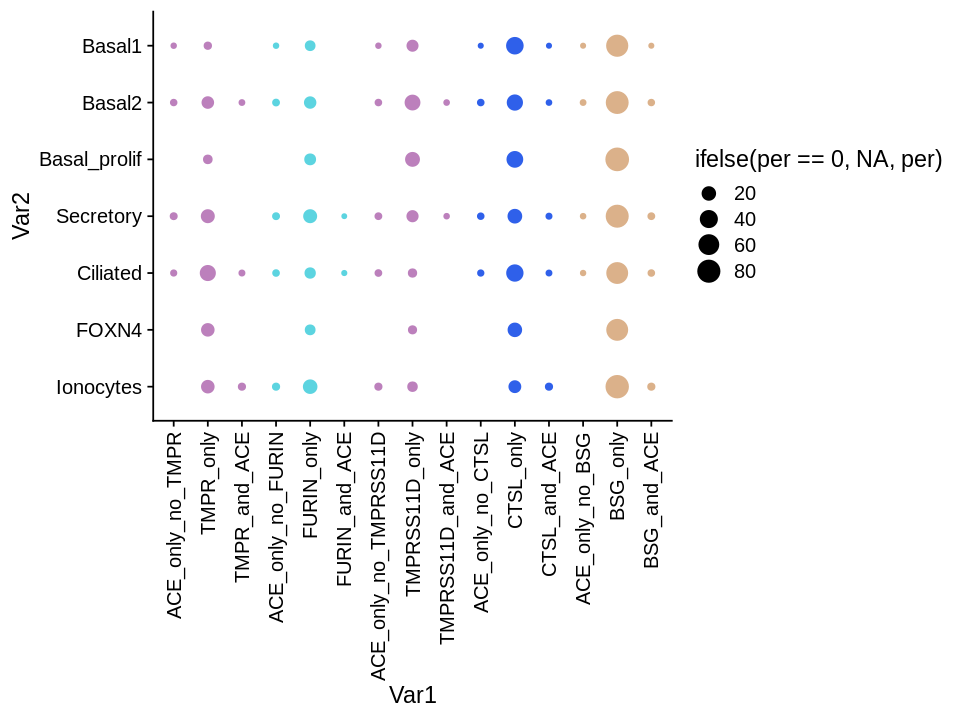

In [123]:
options(repr.plot.width=8, repr.plot.height=6)
ggplot(data=df, aes(Var1, Var2)) + 
geom_point(colour = df$colour, aes(size=ifelse(per==0, NA, per))) + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
  scale_colour_identity()

setwd('/home/jovyan/data/covid/data/nasal/figures')

ggsave("TMPRSS2.png", plot = last_plot(), device = NULL, path = NULL, width = 6, height = 6, scale = 1)



***Look for higher interferon response in uninfected cells - do transitional cells have reduced capacity to respond***



In [24]:
Idents(covid)<-"Treatment"
covid_S<-subset(covid, id = "Pos")

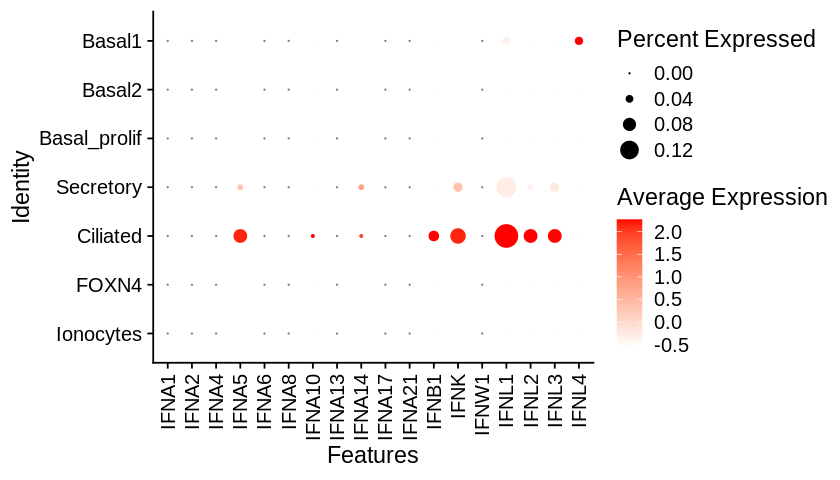

In [4]:
options(repr.plot.width=7, repr.plot.height=4)
Idents(covid_S)<-"initial_clustering"
DotPlot(covid_S, features = c("IFNA1", "IFNA2", "IFNA4", "IFNA5", "IFNA6", "IFNA8", "IFNA10", "IFNA13", "IFNA14", "IFNA17", "IFNA21",
                                 "IFNB1", 
                                 "IFNK", 
                                 "IFNW1", 
                                 "IFNL1", "IFNL2", "IFNL3", "IFNL4"), cols = c("white", "red"))+ theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


setwd('/home/jovyan/data/covid/data/nasal/figures')

ggsave("nasal_stim_IFN_production.png", plot = last_plot(), device = NULL, path = NULL,width = 7, height = 4,  scale = 1)

In [12]:
covid@meta.data$combined<-paste0(covid@meta.data$initial_clustering, '_', covid@meta.data$Treatment)

In [13]:
covid@meta.data$combined <- factor(covid@meta.data$combined, 
                                   levels = rev(c("Basal1_Neg", "Basal1_Pos", 
                                              "Basal2_Neg", "Basal2_Pos", 
                                              "Basal_prolif_Neg", "Basal_prolif_Pos", 
                                              "Secretory_Neg", "Secretory_Pos",
                                              "Ciliated_Neg", "Ciliated_Pos",
                                              "FOXN4_Neg", "FOXN4_Pos", 
                                              "Ionocytes_Neg", "Ionocytes_Pos" 
                                             )))

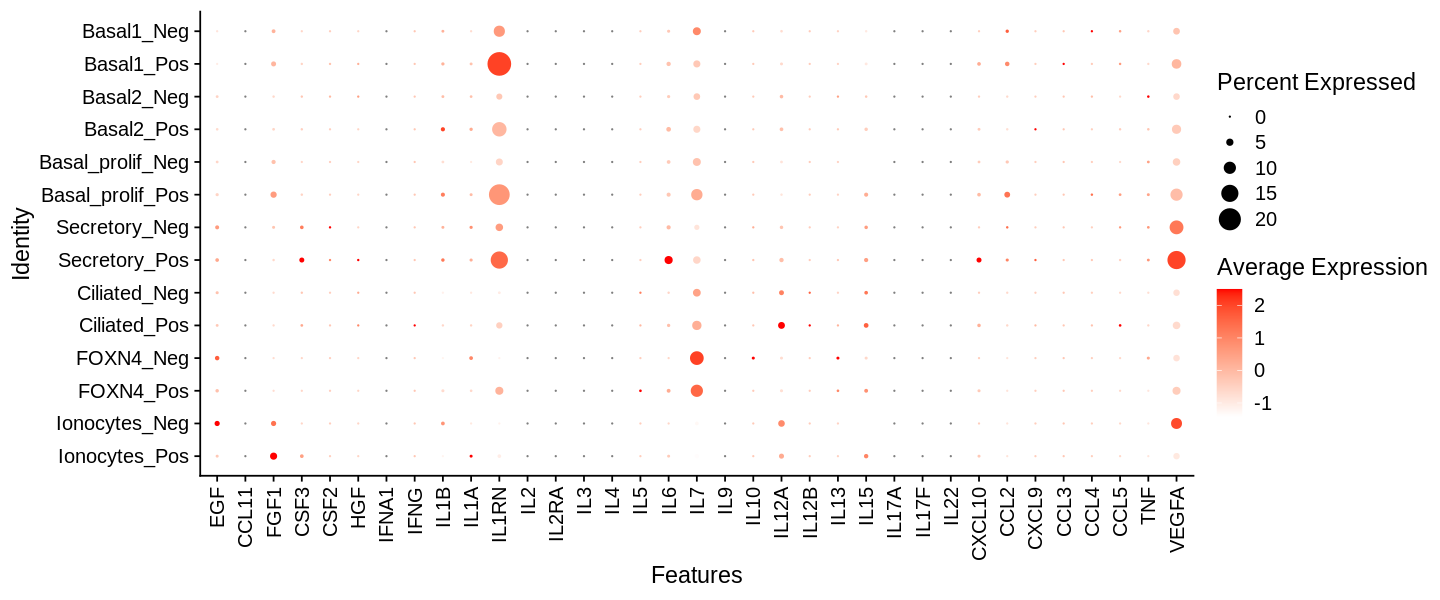

In [17]:
options(repr.plot.width=12, repr.plot.height=5)
Idents(covid)<-"combined"
DotPlot(covid, features = c("EGF", "CCL11", "FGF1", "CSF3", "CSF2", "HGF", "IFNA1", "IFNG", "IL1B", 
                              "IL1A", "IL1RN", "IL2", "IL2RA", "IL3", "IL4", "IL5", "IL6", "IL7", 
                              "IL9", "IL10", "IL12A", "IL12B", "IL13", "IL15", "IL17A", "IL17F", "IL22", 
                              "CXCL10", "CCL2", "CXCL9", "CCL3", "CCL4", "CCL5", "TNF", "VEGFA"), 
        cols = c("white", "red"))+ theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


setwd('/home/jovyan/data/covid/data/nasal/figures')

ggsave("cytokine_production_by_stimulated.png", plot = last_plot(), device = NULL, path = NULL,width = 12, height = 5,  scale = 1)



***Enrichment testing***



In [7]:
setwd('/home/jovyan/data/covid/data')
covid<-readRDS("covid_nasal.RDS")

In [8]:
###Import ISG gene list

setwd('/home/jovyan/data/covid/data/nasal')
IFN_genes<-read.csv("ISG_list_CD.csv", header=FALSE)
IFN_genes<-IFN_genes$V1

In [30]:
scores<-list(IFN = IFN_genes)

In [132]:
#prepare data

data<-GetAssayData(covid, slot = "counts")
data<-t(data)
data<-as.data.frame(data)

meta<-covid@meta.data %>% dplyr::select(initial_clustering, combined)

In [133]:
data$initial_cluster<-meta$initial_clustering
data$combined<-meta$combined

In [134]:
test <- data[data$initial_cluster == "Ciliated",]

In [135]:
df<-data.frame(expression = character(), Status = character())
df2<-data.frame(cells = character(), Status = character(), IFN = character, celltype = character())

for (k in unique(data$initial_cluster)){
    test <- data %>% filter(initial_cluster == k)
for (i in unique(test$combined)){
    #subset by status
    test<-data %>% filter(combined == i)
    
    for (j in 1:length(scores)){
    #subset expression matrix in to genes present in each enrichment score    
        test_filtered<-test[colnames(test) %in% scores[[j]]]
        #make an empty dataframe to fill with summary scores
        if(j == 1){
            status_data<-data.frame(cells = rownames(test_filtered))
            status_data$Status<-i
            status_data$celltype<-k
        }
        #add a column called expression that has the average expression of these enrichment score genes
        test_filtered$expression<-rowSums(test_filtered)/length(scores[[j]])
        #add a sample_id column - not used
              #test_filtered$sample_id<-test$sample_id
        #filter out only the average expression value
        result<-select(test_filtered, "expression")
        #name the expression column by which enrichment score you're checking (e.g. erythroid)
        colnames(result)<-names(scores)[j]
        #repeat for each enrichment score
        status_data<-cbind(status_data, result)}
    #repeat for each status
    df<-rbind(df, status_data)
#    df$celltype<-k
    df2<-rbind(df2, df)
    }
    
    }


In [136]:
df2 <- df2 %>% filter(Status != "Neg_infected")

In [137]:
df2$Status <- factor(df2$Status, levels = c("Neg_uninfected", "Pos_uninfected", "Pos_infected"))


In [139]:
df2$celltype <- factor(df2$celltype, levels = c("Basal1", "Basal2", "Basal_prolif",
                                               "Secretory", "Ciliated", "FOXN4", "Ionocytes"))

In [146]:
df<-data.frame(diff = character(), lwr = character(), upr = character(), `p adj` = character(), celltype = character())
for (i in unique(df2$celltype)){
    test<-df2 %>% filter(celltype == i)
    res.aov <- aov(IFN ~ Status, data = test)
    a<-TukeyHSD(res.aov)$Status
    a<-as.data.frame(a)
    a$celltype <- i
    df<-rbind(df, a)
    }
    
    

In [147]:
setwd('/home/jovyan/data/covid/data/nasal/figures')
write.csv(df, "IFN_enrichment_stats.csv")

Warning message:
“Removed 13405 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 13405 rows containing non-finite values (stat_boxplot).”


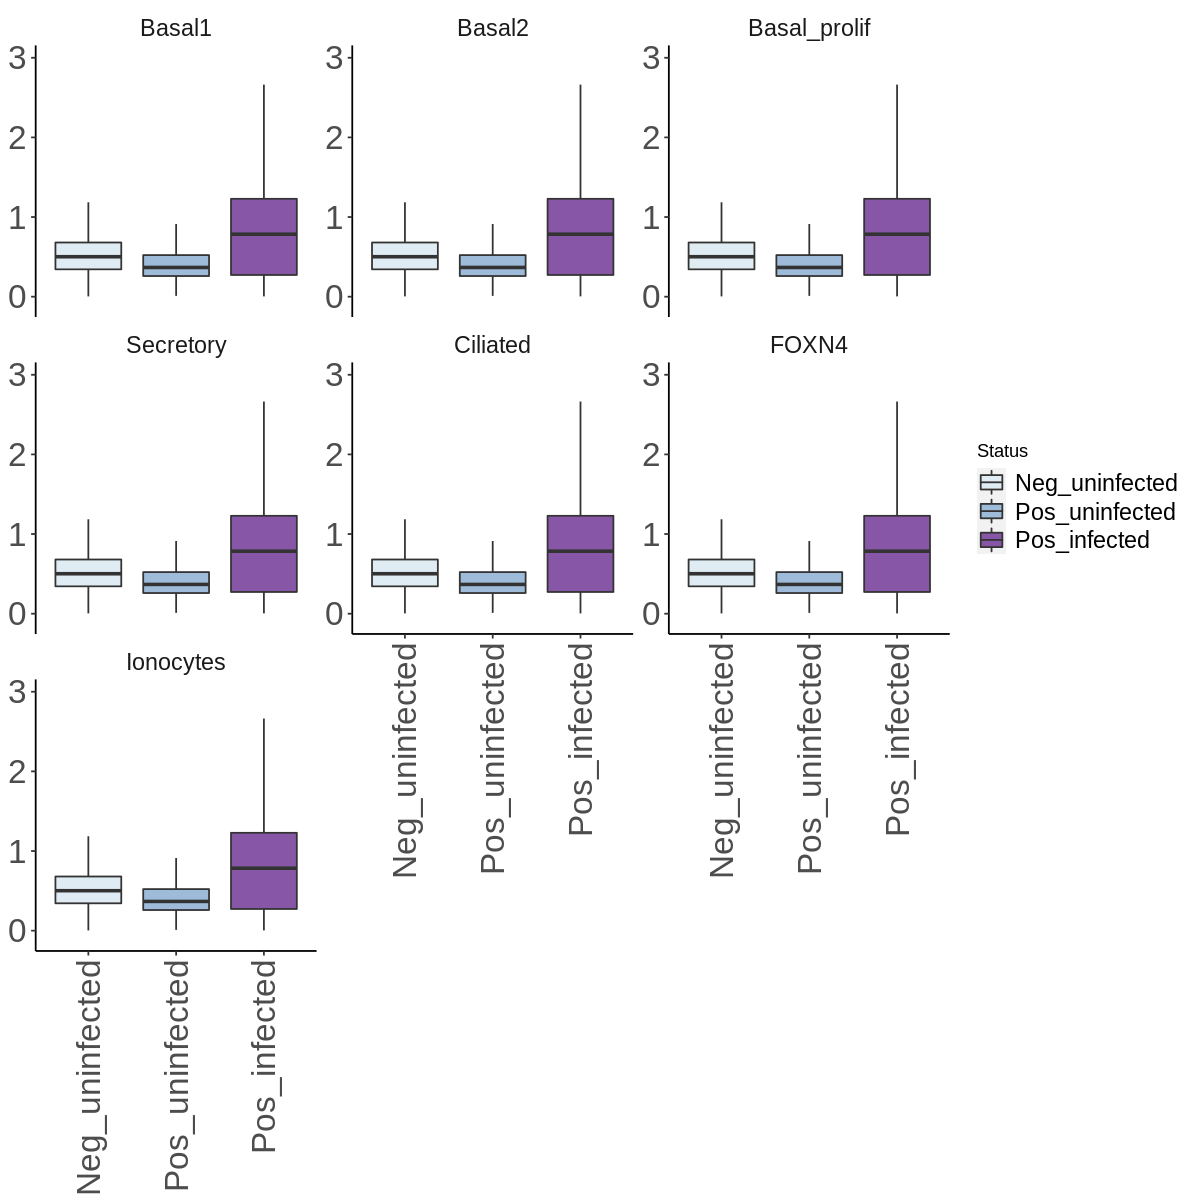

In [162]:
options(repr.plot.width=10, repr.plot.height=10)

ggplot(df2, aes(x=Status, y=IFN, fill = Status)) + 
  geom_boxplot(outlier.shape = NA)+

theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+
    scale_fill_brewer(palette="BuPu")+
theme(axis.title.x = element_blank(),
     axis.title.y = element_blank(),
     axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size = 20),
     axis.text.y = element_text(size = 20))+
facet_wrap(~celltype, ncol = 3, scales = "free_y")+
theme(strip.text.x = element_text(size = 14),
                                 strip.background =element_rect(fill="white"),
      legend.text=element_text(size=14))+ylim(-0.1,3)

setwd('/home/jovyan/data/covid/data/nasal/figures')

ggsave("IFN_gene_enrichment.png", plot = last_plot(), device = NULL, path = NULL,width = 10, 
       height = 10, scale = 1)